# MIE1624H Introductory Example

### US Baby Names 2010

In [1]:
%pwd

u'/resources'

http://www.ssa.gov/oact/babynames/limits.html

Load file into a DataFrame

In [2]:
import pandas as pd

names2010 = pd.read_csv('/resources/yob2010.txt', names=['name', 'sex', 'births'])
names2010

,name,sex,births
0,Isabella,F,22731
1,Sophia,F,20477
2,Emma,F,17179
3,Olivia,F,16860
4,Ava,F,15300
5,Emily,F,14172
6,Abigail,F,14124
7,Madison,F,13070
8,Chloe,F,11656
9,Mia,F,10541


Total number of birth in year 2010 by sex

In [3]:
names2010.groupby('sex').births.sum()

sex
F    1759010
M    1898382
Name: births, dtype: int64

Insert `prop` column for each group

In [4]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names2010 = names2010.groupby(['sex']).apply(add_prop)

In [5]:
names2010

,name,sex,births,prop
0,Isabella,F,22731,0.012923
1,Sophia,F,20477,0.011641
2,Emma,F,17179,0.009766
3,Olivia,F,16860,0.009585
4,Ava,F,15300,0.008698
5,Emily,F,14172,0.008057
6,Abigail,F,14124,0.008030
7,Madison,F,13070,0.007430
8,Chloe,F,11656,0.006626
9,Mia,F,10541,0.005993


Verify that the `prop` clumn sums to 1 within all the groups

In [7]:
import numpy as np

np.allclose(names2010.groupby(['sex']).prop.sum(), 1)

True

Extract a subset of the data with the top 10 names for each sex

In [8]:
def get_top10(group):
    return group.sort_index(by='births', ascending=False)[:10]
grouped = names2010.groupby(['sex'])
top10 = grouped.apply(get_top10)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [9]:
top10.index = np.arange(len(top10))

In [10]:
top10

,name,sex,births,prop
0,Isabella,F,22731,0.012923
1,Sophia,F,20477,0.011641
2,Emma,F,17179,0.009766
3,Olivia,F,16860,0.009585
4,Ava,F,15300,0.008698
5,Emily,F,14172,0.008057
6,Abigail,F,14124,0.008030
7,Madison,F,13070,0.007430
8,Chloe,F,11656,0.006626
9,Mia,F,10541,0.005993


Aggregate all birth by the first latter from `name` column

In [11]:
# extract first letter from name column
get_first_letter = lambda x: x[0]
first_letters = names2010.name.map(get_first_letter)
first_letters.name = 'first_letter'

table = names2010.pivot_table('births', index=first_letters,
                          columns=['sex'], aggfunc=sum)

In [12]:
table.head()

sex,F,M
first_letter,,
A,309608,198870
B,64191,108460
C,96780,168356
D,47211,123298
E,118824,102513


Normalize the table

In [13]:
table.sum()

sex
F    1759010
M    1898382
dtype: int64

In [14]:
letter_prop = table / table.sum().astype(float)

Plot proportion of boys and girls names starting in each letter

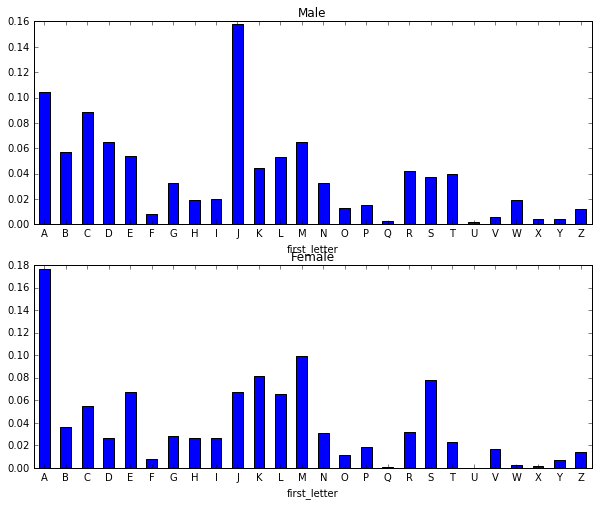

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)